<div style="border-bottom: 3px solid #000;"></div>


<center>
  <h1><strong style="color:Black;">Supervised Classification Models (RandomForest, KNN, SVM, DecisionTrees and Logistic Regression) with Hyperparameter Tuning to predict class of silicates based on refractive index and atomic weight percent in corresponding oxide.</strong></h1>
</center>


<div style="border-bottom: 3px solid #000;"></div>

## Table of Contents

* [Importing Libraries](#chapter1)

* [About the Dataset](#chapter2)

* [Visualising the data](#chapter3)
    * [Correlation Heatmap](#chapter3.1)
    * [Insights](#chapter3.2)

* [KNN - K Nearest Neighbors](#chapter4)

* [SVM - Support Vector Machines](#chapter5)

* [Logistic Regression](#chapter6)

* [Decision Trees](#chapter7)

* [Random Forest Classifiers](#chapter8)

* [Overall_Report](#chapter9)

<div style="border-bottom: 3px solid #000;"></div>

## Importing Libraries <a class="anchor" id="chapter1"></a>

In [1]:
# Suppressing warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

<div style="border-bottom: 3px solid #000;"></div>

## About the Dataset <a class="anchor" id="chapter2"></a>

**Context**
This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete).

**Acknowledgements**
https://archive.ics.uci.edu/ml/datasets/Glass+Identification

**Creator:**
B. German
Central Research Establishment
Home Office Forensic Science Service
Aldermaston, Reading, Berkshire RG7 4PN

**Donor:**
Vina Spiehler, Ph.D., DABFT
Diagnostic Products Corporation
(213) 776-0180 (ext 3014)


**Source:** https://www.kaggle.com/datasets/uciml/glass

### Attribute Information:

1. **RI**: Refractive Index
2. **Na**: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 3-9)
3. **Mg**: Magnesium
4. **Al**: Aluminum
5. **Si**: Silicon
6. **K**: Potassium
7. **Ca**: Calcium
8. **Ba**: Barium
9. **Fe**: Iron

### Type of Glass (Class Attribute):

- **1**: Building windows float processed
- **2**: Building windows non-float processed
- **3**: Vehicle windows float processed
- **4**: Vehicle windows non-float processed (none in this database)
- **5**: Containers
- **6**: Tableware
- **7**: Headlamps



In [3]:
df = pd.read_csv("Glass.csv")

In [4]:
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<div style="border-bottom: 3px solid #000;"></div>

# Visualising the data <a class="anchor" id="chapter3"></a>
#### (Scatterplot matrix using seaborn)

Text(0.5, 1.0, 'Scatterplot matrix')

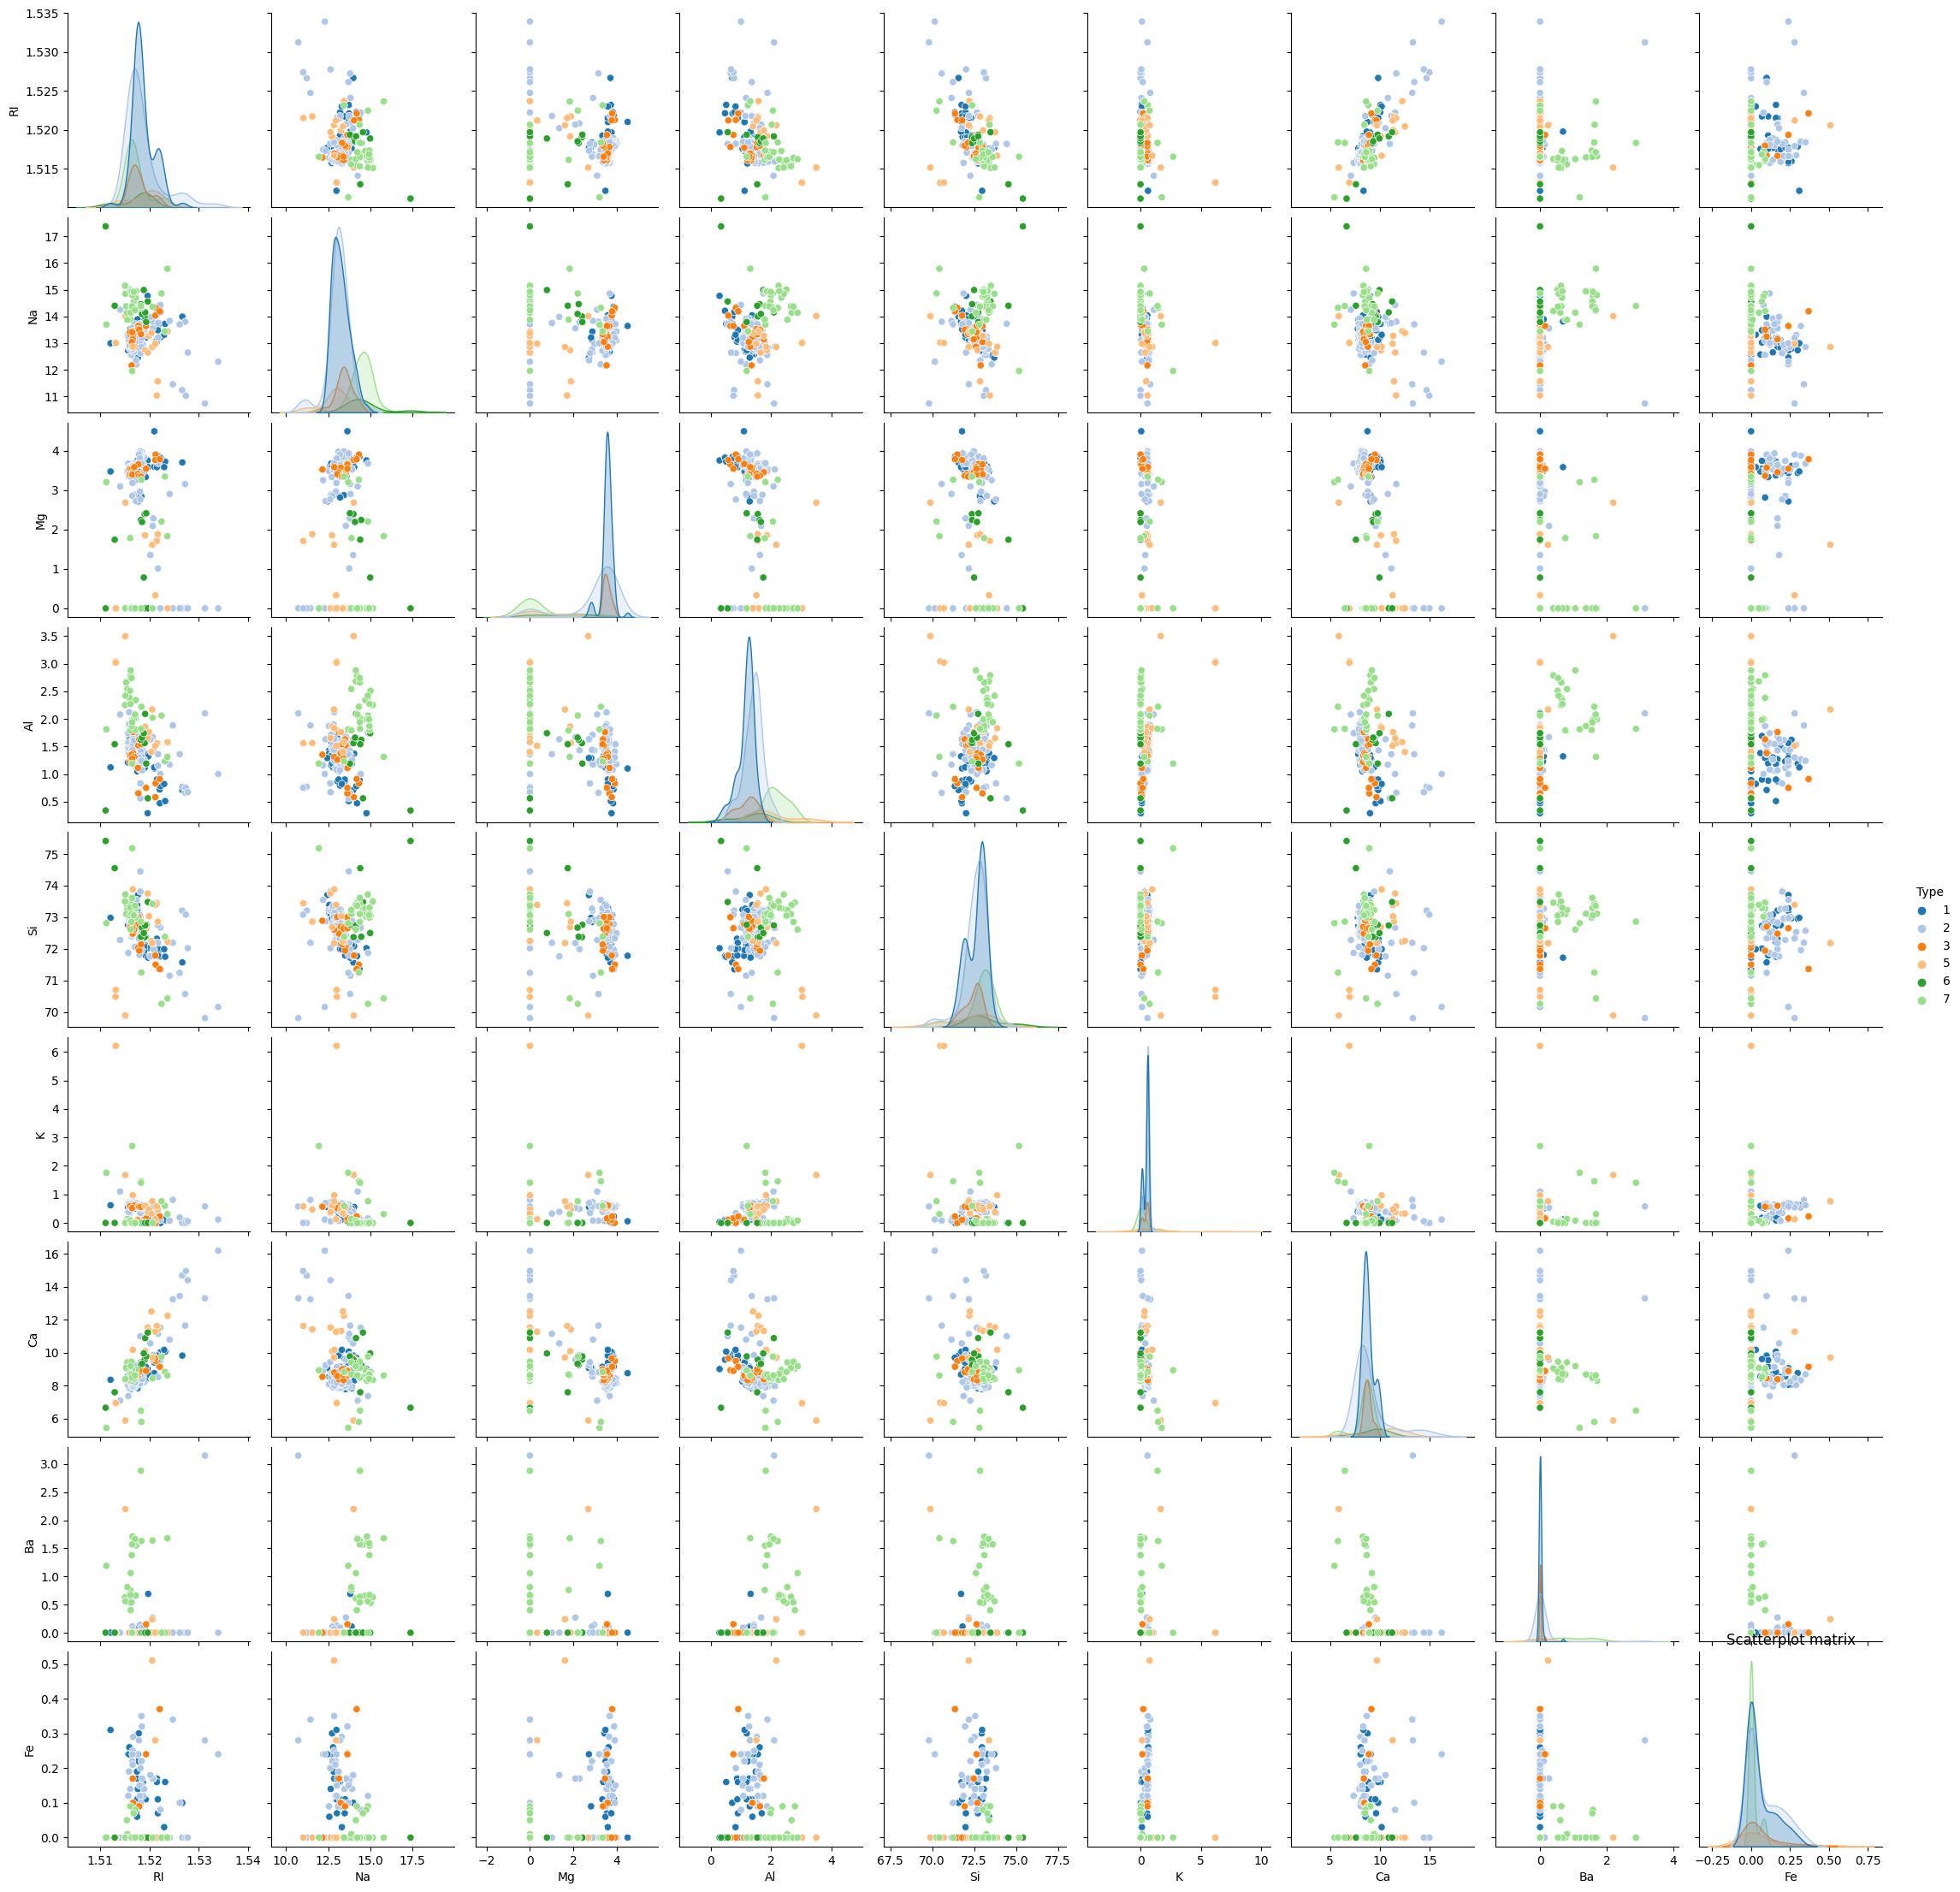

In [5]:
sns.pairplot(df, hue='Type', palette = 'tab20')
plt.title("Scatterplot matrix")

## Correlation Heatmap <a class="anchor" id="chapter3.1"></a>

Text(0.5, 1.0, 'Correlation Heatmap')

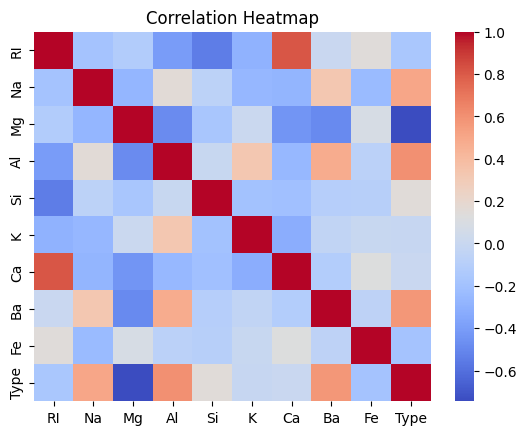

In [6]:
corr = df.corr() #Correlation matrix
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap')

## Insights: <a class="anchor" id="chapter3.2"></a>
* The plots show that the Mg composition does not have much effect on the type of glass, therefore we can drop the column from the dataset and work further without any significant compromise on accuracy but reducing the computational power and time. 


In [7]:
df.drop(columns = "Mg", inplace = True)
features = df.drop(columns='Type', axis=1)
Y = df['Type']

In [8]:
features.head(5)

,RI,Na,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,1.24,73.08,0.55,8.07,0.0,0.0


In [9]:
Y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

<div style="border-bottom: 3px solid #000;"></div>


# KNN (K-nearest neighbors) <a class="anchor" id="chapter4"></a>

## Splitting Data into train and test: <a class="anchor" id="chapter4.1"></a>
### Using train_size = 0.8 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, train_size=0.8, random_state = 73)

### Fitting the training samples into the KNN model for different values of K(from 1 to 20) and finding the accuracy of the model using f1_score, accuracy_score and jaccard index :

In [11]:
F1_Scores = []
Accuracy_Scores = []
Jaccard_Scores = []

for i in range(1, 21):
    K = i
    KNN = KNeighborsClassifier(n_neighbors=K).fit(x_train, y_train)
    predictions = KNN.predict(x_test)
    
    KNN_F1_Score = metrics.f1_score(y_test, predictions, average='weighted')
    F1_Scores.append(KNN_F1_Score)
    
    KNN_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
    Accuracy_Scores.append(KNN_Accuracy_Score)
    
    KNN_JaccardIndex = metrics.jaccard_score(y_test, predictions, average='weighted')
    Jaccard_Scores.append(KNN_JaccardIndex)

## Hyperparameter tuning <a class="anchor" id="chapter4.2"></a>

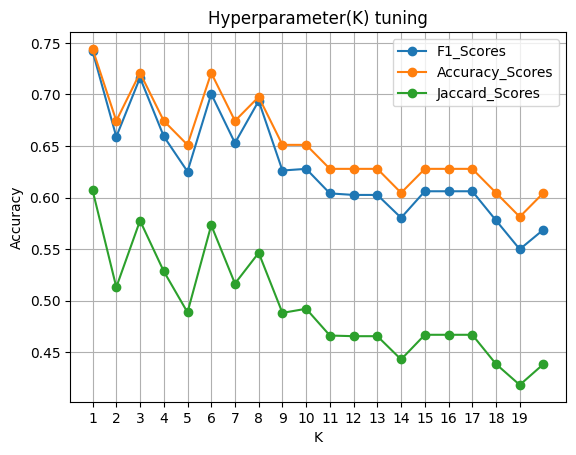

In [12]:
import matplotlib.pyplot as plt

x = range(1,21)
plt.title("Hyperparameter(K) tuning")
plt.plot(x, F1_Scores, label = "F1_Scores", marker = 'o')
plt.plot(x, Accuracy_Scores, label = "Accuracy_Scores", marker = 'o')
plt.plot(x, Jaccard_Scores, label = "Jaccard_Scores", marker = 'o')
plt.legend(loc = "best")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(range(1, 20))
plt.grid(True)


## Analysis of Model Accuracy <a class="anchor" id="chapter4.3"></a>

From the plot, it's evident that the accuracy of the model peaks at K = 1. This observation typically indicates overfitting, where the model fits the training data too closely, resulting in poor generalization to unseen data.
Overfitting often occurs when the dataset is small, lacking sufficient samples for the model to adequately learn patterns that generalize well to out-of-sample test cases.



### Solution: <a class="anchor" id="chapter4.31"></a>

Since the dataset is small, we need to increase the fraction of data we are using for training the model. We used 0.8 (80%), now lets train the model on 95% of the dataset (train_size = 0.95)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, train_size=0.95, random_state = 73)

In [14]:
F1_Score = []
Accuracy_Score = []
Jaccard_Score = []

for i in range(1, 21):
    K = i
    KNN = KNeighborsClassifier(n_neighbors=K).fit(x_train, y_train)
    predictions = KNN.predict(x_test)
    
    KNN_F1_Score = metrics.f1_score(y_test, predictions, average='weighted')
    F1_Score.append(KNN_F1_Score)
    
    KNN_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
    Accuracy_Score.append(KNN_Accuracy_Score)

    KNN_JaccardIndex = metrics.jaccard_score(y_test, predictions, average='weighted')
    Jaccard_Score.append(KNN_JaccardIndex)

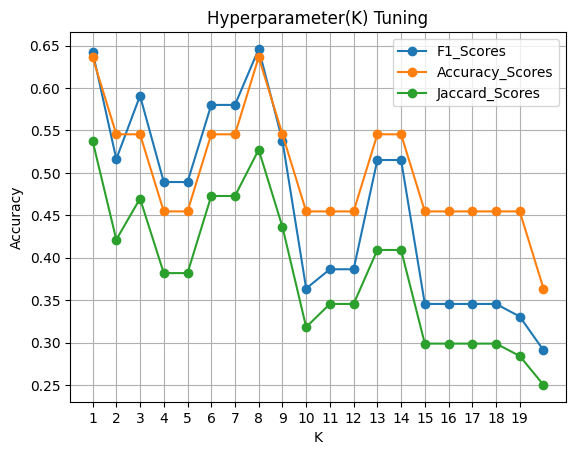

In [15]:
import matplotlib.pyplot as plt

x = range(1,21)
plt.title("Hyperparameter(K) Tuning")
plt.plot(x, F1_Score, label = "F1_Scores", marker = 'o')
plt.plot(x, Accuracy_Score, label = "Accuracy_Scores", marker = 'o')
plt.plot(x, Jaccard_Score, label = "Jaccard_Scores", marker = 'o')
plt.legend(loc = "best")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(range(1, 20))
plt.grid(True)


## Analysis of Model Accuracy <a class="anchor" id="chapter4.4"></a>

The plot peaks at K = 8. This solves the overfitting problem.


In [16]:
KNN = KNeighborsClassifier(n_neighbors=8).fit(x_train, y_train)
predictions = KNN.predict(x_test)
f1 = F1_Score[7]
accuracy = Accuracy_Score[7]
jaccard = Jaccard_Score[7]
KNN_Report = pd.DataFrame({
    'Metrics': ['F1 Score', 'Accuracy', 'Jaccard Score'],
    'Value': [f1, accuracy, jaccard]
})
KNN_Report

,Metrics,Value
0,F1 Score,0.646104
1,Accuracy,0.636364
2,Jaccard Score,0.527273


## Heatmap between predicted and actual values: <a class="anchor" id="chapter4.5"></a>

Text(0.5, 1.0, 'Heatmap')

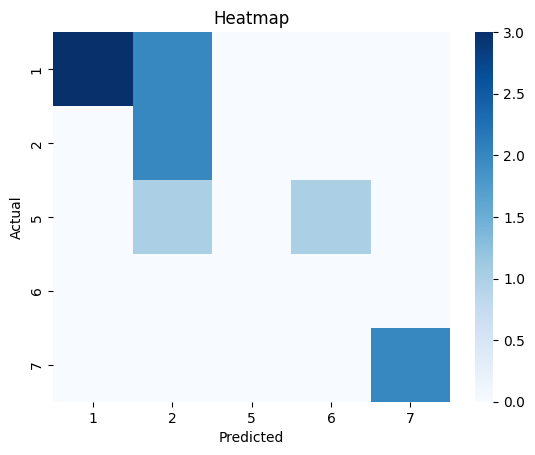

In [17]:
unique_labels = np.unique(np.concatenate((y_test, predictions)))
cm = confusion_matrix(predictions, y_test)
sns.heatmap(cm, cmap="Blues", xticklabels = unique_labels, yticklabels = unique_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Heatmap")

<div style="border-bottom: 3px solid #000;"></div>

# SVM (Support Vector Machines) <a class="anchor" id="chapter5"></a>

## Splitting data into 80% train: <a class="anchor" id="chapter5.1"></a>

In [18]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, train_size=0.8, random_state = 73)

## Hyperparameter (C) tuning: <a class="anchor" id="chapter5.2"></a>

In [19]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
F1_Scores = []
Accuracy_Scores = []
Jaccard_Scores = []
for i in C_values:
    SVM = svm.SVC(C = i, kernel = 'linear').fit(x_train, y_train)
    predictions = SVM.predict(x_test)
    F1_Scores.append(f1_score(y_test, predictions, average = "weighted"))
    Accuracy_Scores.append(accuracy_score(y_test, predictions))
    Jaccard_Scores.append(jaccard_score(y_test, predictions, average = "weighted"))

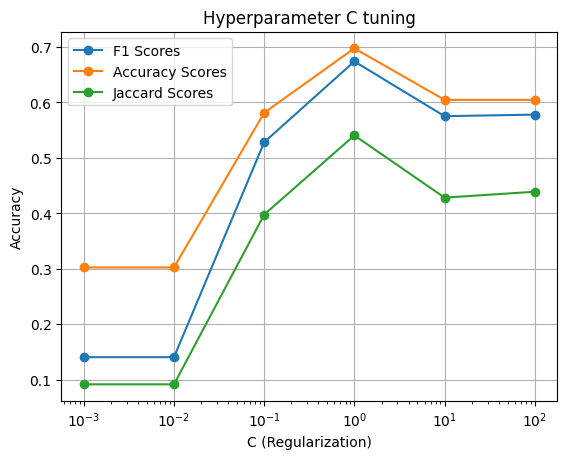

In [20]:
'''Since the C_values are not linear and span several orders of magnitude but the y values are linear, 
we use semilogx'''

plt.semilogx(C_values, F1_Scores, label='F1 Scores', marker='o')
plt.semilogx(C_values, Accuracy_Scores, label='Accuracy Scores', marker='o')
plt.semilogx(C_values, Jaccard_Scores, label='Jaccard Scores', marker='o')
plt.xlabel("C (Regularization)")
plt.ylabel("Accuracy")
plt.title("Hyperparameter C tuning")
plt.grid(True)
plt.legend(loc = "best")


It is evident from the plot that accuracy is highest for C = 1. 

## Report for SVM <a class="anchor" id="chapter5.3"></a>

In [21]:
SVM = svm.SVC(C = 1, kernel = 'linear').fit(x_train, y_train)
predictions = SVM.predict(x_test)
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
jaccard = jaccard_score(y_test, predictions, average='weighted')
SVM_Report = pd.DataFrame({
    'Metrics': ['F1 Score', 'Accuracy', 'Jaccard Score'],
    'Value': [f1, accuracy, jaccard]
})
SVM_Report


,Metrics,Value
0,F1 Score,0.674073
1,Accuracy,0.697674
2,Jaccard Score,0.540565


## Heatmap between predicted and actual values: <a class="anchor" id="chapter5.4"></a>

Text(0.5, 1.0, 'Heatmap')

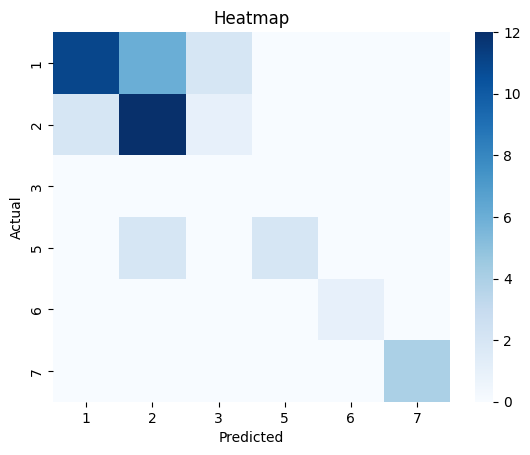

In [22]:
unique_labels = np.unique(np.concatenate((y_test, predictions)))
cm = confusion_matrix(predictions, y_test)
sns.heatmap(cm, cmap="Blues", xticklabels = unique_labels, yticklabels = unique_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Heatmap")

<div style="border-bottom: 3px solid #000;"></div>

# Logistic Regression <a class="anchor" id="chapter6"></a>

### Splitting data into 80% train:

In [23]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, train_size=0.8, random_state = 73)

### Hyperparameter(solver) tuning:

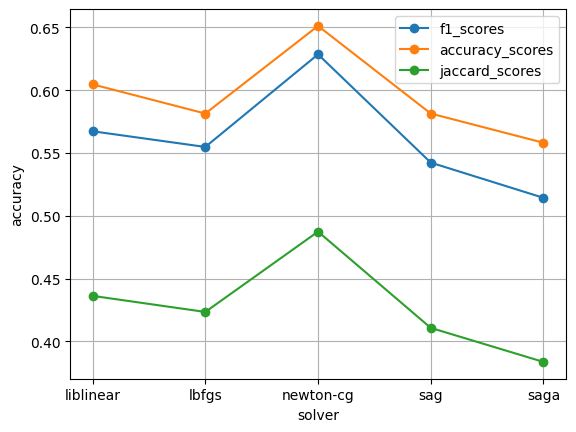

In [24]:
Accuracy_Score_LR = []
Jaccard_Score_LR = []
F1_Score_LR = []
solvers =['liblinear' , 'lbfgs' , 'newton-cg' , 'sag' , 'saga']
for i in solvers:
    LR = LogisticRegression(solver = i).fit(x_train, y_train)
    predictions = LR.predict(x_test)
    F1_Score_LR.append(f1_score(y_test, predictions, average = 'weighted'))
    Accuracy_Score_LR.append(accuracy_score(y_test, predictions))
    Jaccard_Score_LR.append(jaccard_score(y_test, predictions, average = 'weighted'))
plt.plot(solvers, F1_Score_LR, label = 'f1_scores', marker = 'o')
plt.plot(solvers, Accuracy_Score_LR, label = 'accuracy_scores', marker = 'o')
plt.plot(solvers, Jaccard_Score_LR, label = 'jaccard_scores', marker = 'o')
plt.xlabel("solver")
plt.ylabel("accuracy")
plt.legend(loc = 'best')
plt.grid(True)

As evident from the graph above, the best solver for this dataset for LogisticRegression is newton-cg solver.

### Report for Logistic Regression

In [25]:
LR = LogisticRegression(solver = 'newton-cg').fit(x_train, y_train)
predictions = LR.predict(x_test)
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
jaccard = jaccard_score(y_test, predictions, average='weighted')
LR_Report = pd.DataFrame({
    'Metrics': ['F1 Score', 'Accuracy', 'Jaccard Score'],
    'Value': [f1, accuracy, jaccard]
})
LR_Report

,Metrics,Value
0,F1 Score,0.628529
1,Accuracy,0.651163
2,Jaccard Score,0.487375


### Heatmap between actual and predicted values

Text(0.5, 1.0, 'Heatmap')

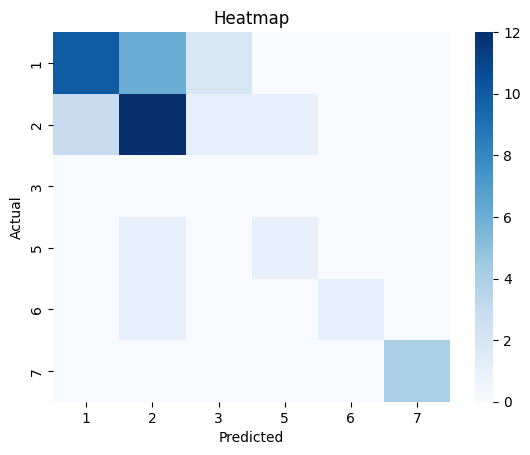

In [26]:
unique_labels = np.unique(np.concatenate((y_test, predictions)))
cm = confusion_matrix(predictions, y_test)
sns.heatmap(cm, cmap="Blues", xticklabels = unique_labels, yticklabels = unique_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Heatmap")

<div style="border-bottom: 3px solid #000;"></div>

# Decision Tree <a class="anchor" id="chapter7"></a>

### Splitting data into 80% train:

In [27]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, train_size=0.8, random_state = 73)

### Hyperparameter(solver) tuning:

Text(0.5, 1.0, 'Hyperparameter (max_depth) tuning')

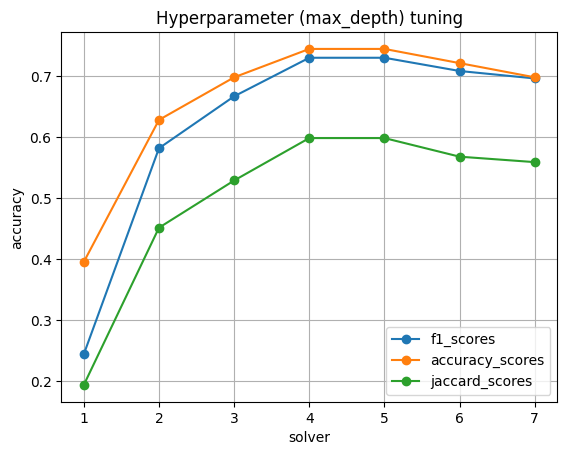

In [28]:
Accuracy_Score_Tree = []
Jaccard_Score_Tree = []
F1_Score_Tree = []
depths = np.arange(1,8)

for i in depths:
    Tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = i).fit(x_train, y_train)
    predictions = Tree.predict(x_test)
    F1_Score_Tree.append(f1_score(y_test, predictions, average = 'weighted'))
    Accuracy_Score_Tree.append(accuracy_score(y_test, predictions))
    Jaccard_Score_Tree.append(jaccard_score(y_test, predictions, average = 'weighted'))
plt.plot(depths, F1_Score_Tree, label = 'f1_scores', marker = 'o')
plt.plot(depths, Accuracy_Score_Tree, label = 'accuracy_scores', marker = 'o')
plt.plot(depths, Jaccard_Score_Tree, label = 'jaccard_scores', marker = 'o')
plt.xlabel("solver")
plt.ylabel("accuracy")
plt.legend(loc = 'best')
plt.grid(True)
plt.title("Hyperparameter (max_depth) tuning")

As evident from the graph above, the best value of max_depth for this dataset for this decision tree is 4.

In [29]:
Tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4).fit(x_train, y_train)
predictions = Tree.predict(x_test)
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
jaccard = jaccard_score(y_test, predictions, average='weighted')
Tree_Report = pd.DataFrame({
    'Metrics': ['F1 Score', 'Accuracy', 'Jaccard Score'],
    'Value': [f1, accuracy, jaccard]
})
Tree_Report

,Metrics,Value
0,F1 Score,0.729716
1,Accuracy,0.744186
2,Jaccard Score,0.598163


### Heatmap between actual and predicted values

Text(0.5, 1.0, 'Heatmap')

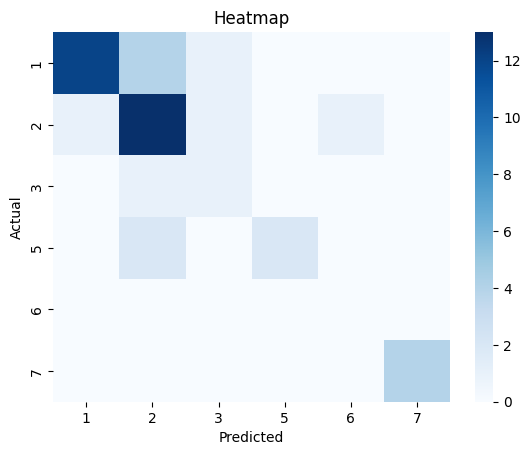

In [30]:
unique_labels = np.unique(np.concatenate((y_test, predictions)))
cm = confusion_matrix(predictions, y_test)
sns.heatmap(cm, cmap="Blues", xticklabels = unique_labels, yticklabels = unique_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Heatmap")

<div style="border-bottom: 3px solid #000;"></div>

# RandomForest Classifier <a class="anchor" id="chapter8"></a>

### Splitting data into 80% train:

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, train_size=0.8, random_state = 73)

### Hyperparameter(n_estimators) tuning:

Text(0.5, 1.0, 'Hyperparameter (n_estimators) tuning for Random Forest')

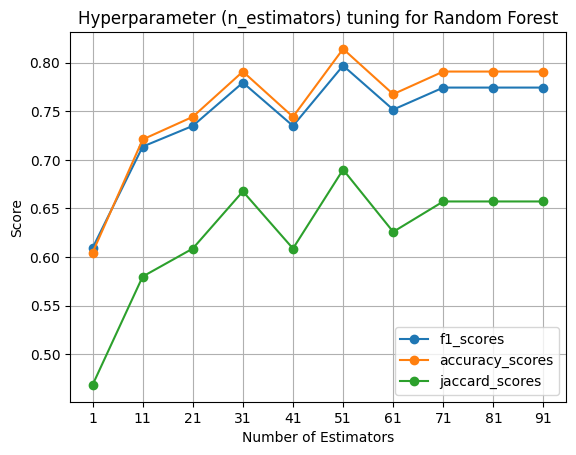

In [32]:
Accuracy_Score_RF = []
Jaccard_Score_RF = []
F1_Score_RF = []
estimators = np.arange(1, 101, 10)

for n_estimator in estimators:

    RF = RandomForestClassifier(n_estimators=n_estimator, criterion='entropy', random_state=7)
    RF.fit(x_train, y_train)
    predictions = RF.predict(x_test)
    F1_Score_RF.append(f1_score(y_test, predictions, average='weighted'))
    Accuracy_Score_RF.append(accuracy_score(y_test, predictions))
    Jaccard_Score_RF.append(jaccard_score(y_test, predictions, average='weighted'))

plt.plot(estimators, F1_Score_RF, label='f1_scores', marker='o')
plt.plot(estimators, Accuracy_Score_RF, label='accuracy_scores', marker='o')
plt.plot(estimators, Jaccard_Score_RF, label='jaccard_scores', marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.xticks(estimators)
plt.legend(loc='best')
plt.grid(True)
plt.title("Hyperparameter (n_estimators) tuning for Random Forest")


As evident from the graph above, the best value of n_estimators for this dataset for this RandomForestClassifier is 50.

### Report for RandomForestClassifier

In [33]:
RF = RandomForestClassifier(n_estimators = 51, criterion='entropy', random_state=73).fit(x_train, y_train)
predictions = RF.predict(x_test)
f1 = F1_Score_RF[5]
accuracy = Accuracy_Score_RF[5]
jaccard = Jaccard_Score_RF[5]
RF_Report = pd.DataFrame({
    'Metrics': ['F1 Score', 'Accuracy', 'Jaccard Score'],
    'Value': [f1, accuracy, jaccard]
})
RF_Report

,Metrics,Value
0,F1 Score,0.796780
1,Accuracy,0.813953
2,Jaccard Score,0.689922


### Heatmap between actual and predicted values

Text(0.5, 1.0, 'Heatmap')

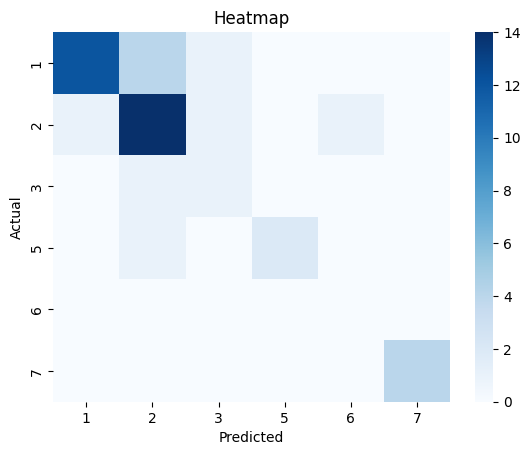

In [34]:
unique_labels = np.unique(np.concatenate((y_test, predictions)))
cm = confusion_matrix(predictions, y_test)
sns.heatmap(cm, cmap="Blues", xticklabels = unique_labels, yticklabels = unique_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Heatmap")

<div style="border-bottom: 3px solid #000;"></div>

# Overall Report <a class="anchor" id="chapter9"></a>

In [35]:
Overall_Report = pd.concat([KNN_Report, SVM_Report, LR_Report, Tree_Report, RF_Report], ignore_index=True)

In [36]:
classifiers = ['KNN', 'SVM', 'LR', 'Tree', 'RandomForest']
num_metrics = 3  

classifier_labels = [classifier for classifier in classifiers for _ in range(num_metrics)]

Overall_Report['Classifier'] = classifier_labels

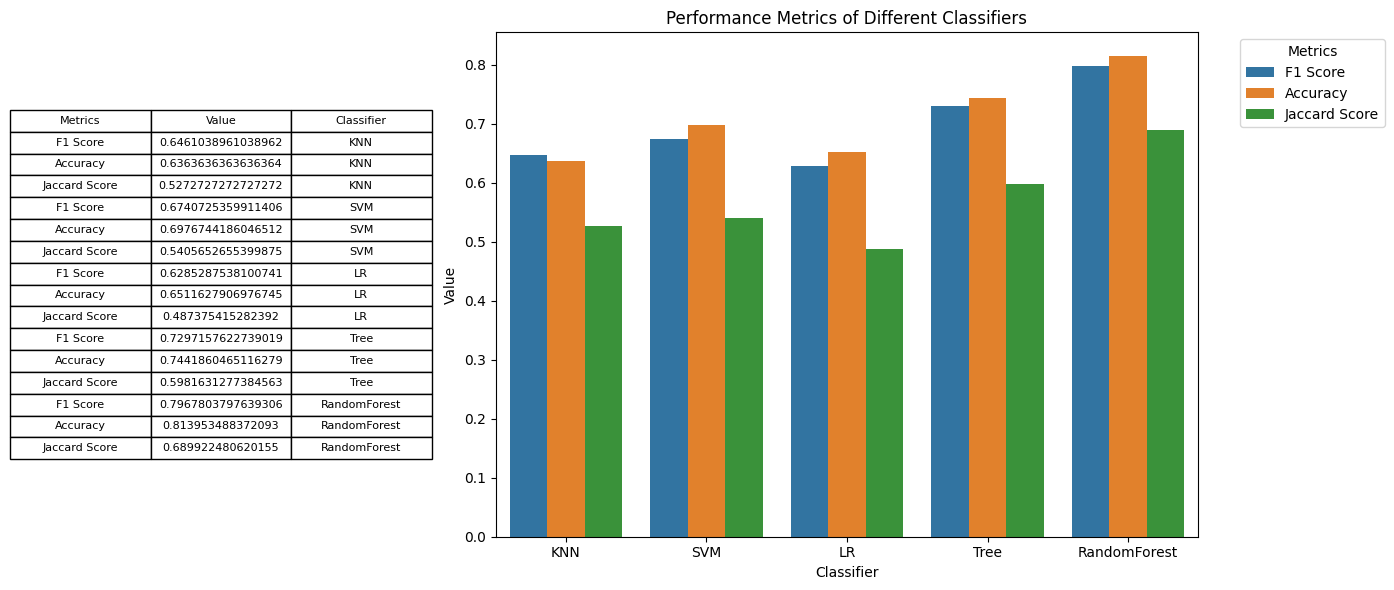

In [37]:
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 2])

# Subplot for printing the dataframe
ax1 = fig.add_subplot(gs[0])
ax1.axis('off')  # Hide the axis
tbl = ax1.table(cellText=Overall_Report.values, colLabels=Overall_Report.columns, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)
tbl.scale(1.2, 1.2)

# Subplot for the bar plot
ax2 = fig.add_subplot(gs[1])
sns.barplot(x="Classifier", y="Value", hue="Metrics", data=Overall_Report, ax=ax2)
ax2.set_title('Performance Metrics of Different Classifiers')
ax2.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

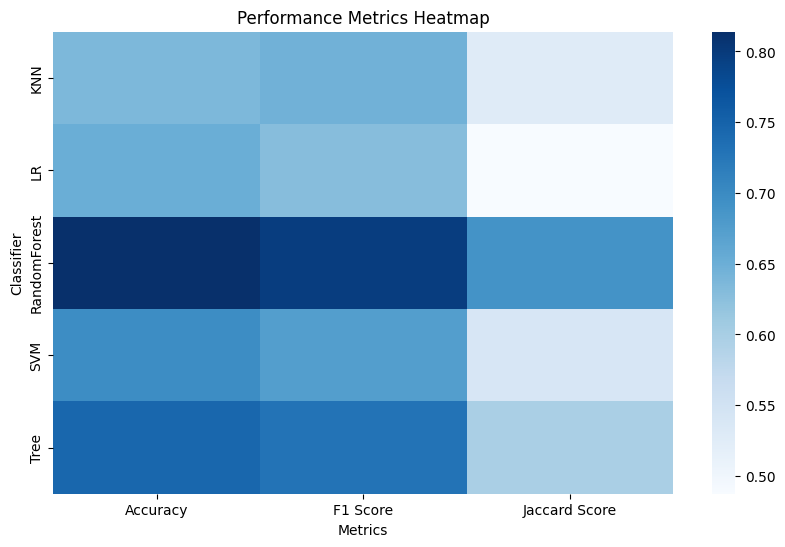

In [38]:
heatmap_data = Overall_Report.pivot("Classifier", "Metrics", "Value")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="Blues", cbar=True)
plt.title('Performance Metrics Heatmap')
plt.show()

<div style="border-bottom: 3px solid #000;"></div>

# Insights: <a class="anchor" id="chapter10"></a>

- As depicted in the above visualizations, **RandomForestClassifier** has exhibited the highest performance across all metrics for this dataset.

- Following Hyperparameter tuning, the subsequent settings yield the best accuracy:
  - For KNN: K (number of nearest neighbors) = 8.
  - For SVM: C (regularization) = 1.
  - For LR: newton-cg solver.
  - For DecisionTree: max_depth = 4.
  - For RandomForestClassifier: number of estimators = 51.


<div style="border-bottom: 3px solid #000;"></div>

<div align="center">
  <h2><strong style="color:#1E90FF;">Thank You!</strong></h2>
</div>

---

**Author:** Tanishq Bhattacharjee  
*Address: Room 902, Bhabha Block, New Hostels, IIT Hyderabad*  

**Email:**  
- [73.tanishq@gmail.com](mailto:73.tanishq@gmail.com)  
- [ms22btech11027@iith.ac.in](mailto:ms22btech11027@iith.ac.in)


<div style="border-bottom: 3px solid #000;"></div>